##Wine Quality Prediction and Analysis

This project uses machine learning models to predict wine quality based on physicochemical attributes. A Random Forest Classifier is used to classify wines into quality categories (Low, Medium, High) after mapping and feature selection, achieving accurate categorizations. Additionally, Ridge Regression is used to test continuous quality score predictions.

###Importing Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive to access the CSV file
drive.mount('/content/drive')

# Define the file path to your CSV file
filepath = '/content/drive/MyDrive/winequality-red.csv'  # Adjust this path if necessary

# Read the CSV file with the correct separator
data = pd.read_csv(filepath, sep=';')

Mounted at /content/drive


In [2]:
# Retrive first 5 rows of data
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# Display summary statistics for each feature in the dataset
# Includes count, mean, standard deviation, min, quartiles, and max
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Key observations include alcohol ranging from 8.4% to 14.9% (mean 10.42%) and volatile acidity with a mean of 0.53 but a wide range from 0.12 to 1.58, which may impact wine quality negatively. The target variable quality has a mean of 5.64, with most wines falling between a quality score of 5 and 6, indicating a focus on mid-tier quality wines.

In [4]:
# Display data types of features
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


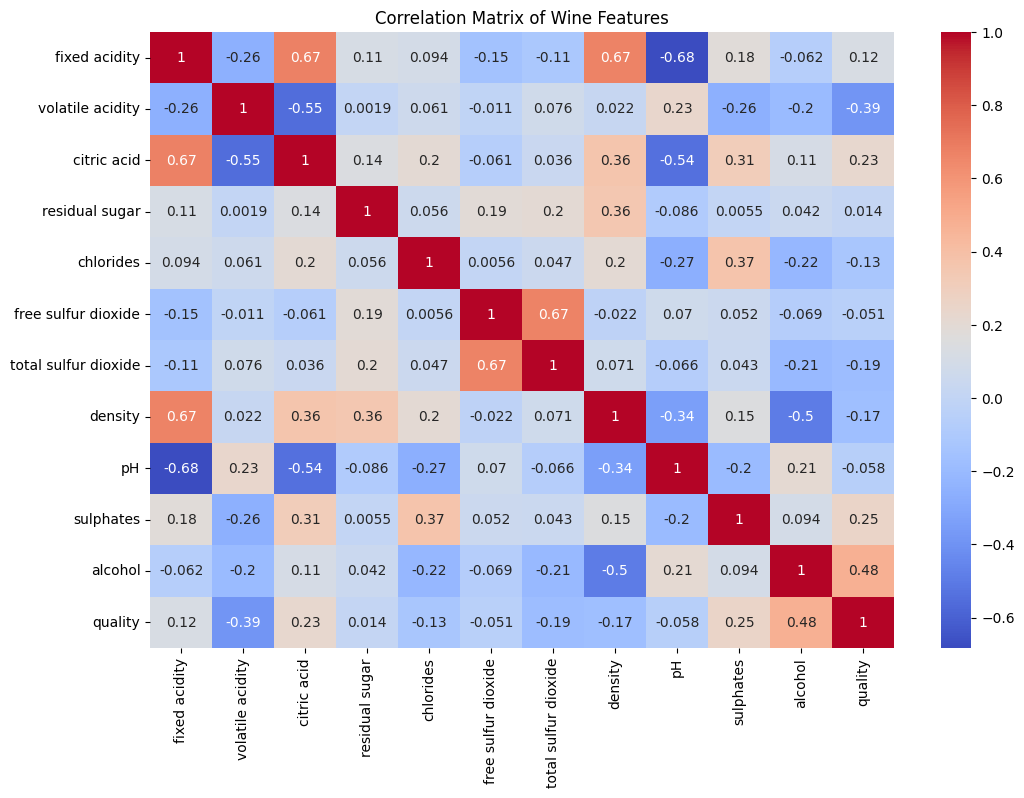

In [5]:
# Compute the Correlation Matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Features')
plt.show()

The correlation matrix shows that alcohol has the highest positive correlation with wine quality (0.48), indicating its strong influence on predicting quality. Volatile acidity shows a moderate negative correlation with quality (-0.39), which suggests higher acidity negatively impacts wine quality. Other features like sulphates (0.25) and citric acid (0.23) also have positive correlations, but their influence is weaker compared to alcohol.

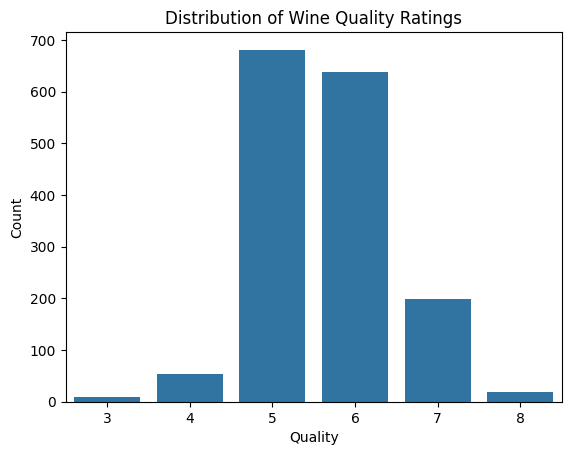

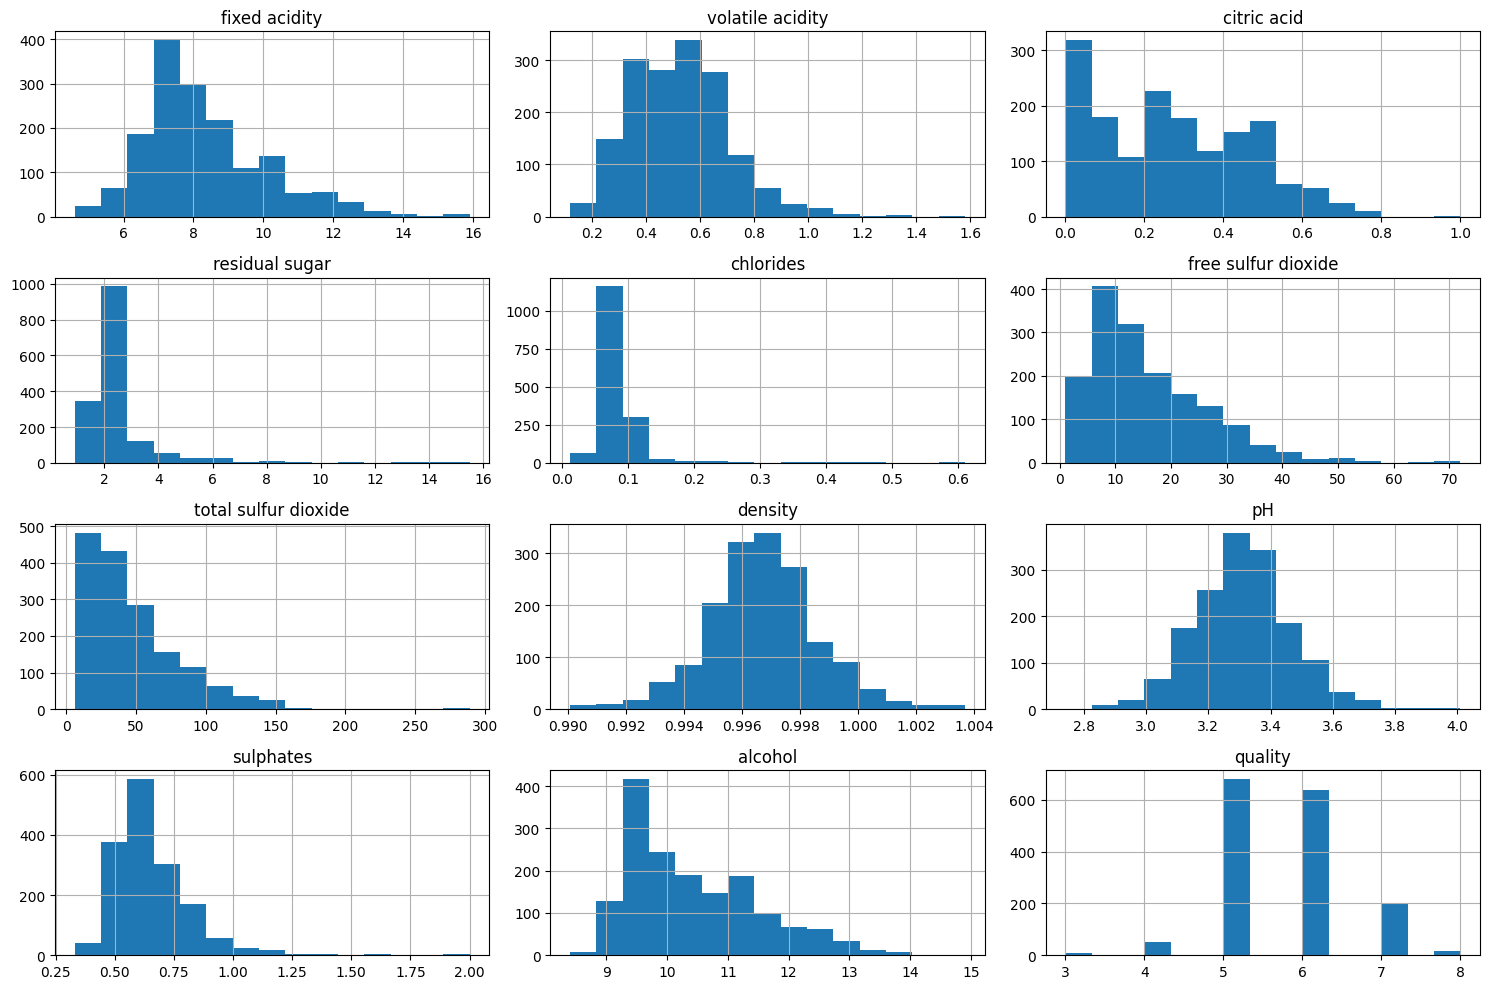

In [6]:
# Plot the distribution of wine quality ratings
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Histograms of all features
data.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


###Ridge Regression

This code trains a Ridge Regression model to predict wine quality. The dataset is split into training and testing sets (80/20), and the features are standardized using StandardScaler to allow for consistent scaling. Ridge Regression is chosen because it includes regularization to reduce overfitting, making it useful for handling correlated features in the dataset.

In [7]:
# Import necessary modules for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model
ridge = Ridge(random_state=42)

# Train the Ridge Regression model
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Evaluation:")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")


Ridge Regression Evaluation:
RMSE: 0.6245
MAE: 0.5036
R² Score: 0.4032


The model achieved an RMSE of 0.6245, indicating the average prediction error, and an MAE of 0.5036, showing the mean absolute prediction difference. The R² score of 0.4032 means the model explains 40.32% of the variability in wine quality, which shows moderate performance with potential for improvement.

### Random Forest Classification

We will now train a Random Forest Classifier to predict wine quality as a classification problem, rather than a regression task. Random Forest is chosen here to handle nonlinear relationships and provide predictions using ensemble learning. It is expected to improve over Ridge Regression, which assumes a linear relationship, by leveraging decision trees and averaging results.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("\nRandom Forest Classification Evaluation:")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")


Random Forest Classification Evaluation:

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 92  8  1]
 [ 0  0  0 18 23  1]
 [ 0  0  0  1  4  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320


Accuracy Score: 0.66


The model achieved an accuracy score of 0.66, showing improved performance over Ridge Regression's R² score of 0.4032. The confusion matrix and classification report indicate that the model performs well on majority classes (quality 5 and 6) but struggles with minority classes (quality 3, 4, and 8), suggesting imbalanced data impacts classification performance.

###Random Forest Classification with Quality Mapping and Feature Selection

This simplifies the target variable into three categories (Low, Medium, High) and selects the top 9 features most correlated with the target using SelectKBest. The Random Forest Classifier is then trained on the reduced dataset, aiming to improve classification accuracy and focus on the most relevant features while reducing noise in the data.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Map quality ratings to three categories: Low (3-4), Medium (5-6), High (7-8)
quality_mapping = {
    3: 'Low',
    4: 'Low',
    5: 'Medium',
    6: 'Medium',
    7: 'High',
    8: 'High'
}

# Create a new column 'quality_label' with the mapped categories
data['quality_label'] = data['quality'].map(quality_mapping)

# 2. Define Features and Target Variable
X_clf = data.drop(['quality', 'quality_label'], axis=1)
y_clf = data['quality_label']

# 3. Encode the Labels (Target Variable)
le = LabelEncoder()
y_encoded = le.fit_transform(y_clf)  # 'High':0, 'Low':1, 'Medium':2 (encoding may vary)

# No need to one-hot encode; proceed with X_clf as is
X_clf_encoded = X_clf.copy()  # Since no encoding is necessary

# 5. Split the Data into Training and Testing Sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 6. Feature Scaling
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# 7. Feature Selection with SelectKBest (Selecting Top k Features)
k = 6 # Adjust k as needed (we have 11 features total)
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_clf_scaled, y_train_clf)

# Get Columns to Keep
cols = selector.get_support(indices=True)
selected_feature_names = X_clf_encoded.columns[cols]
print(f"\nSelected Features (Top {k}): {selected_feature_names.tolist()}")

X_train_selected = X_train_clf_scaled[:, cols]
X_test_selected = X_test_clf_scaled[:, cols]

# 8. Initialize and Train the Random Forest Classifier with Selected Features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train_clf)

# 9. Make Predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# 10. Evaluate the Model
print("\nRandom Forest Classification Evaluation with Decreased Categories and Feature Selection:")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_selected))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_selected, target_names=le.classes_, zero_division=0))

# Accuracy Score
accuracy_selected = accuracy_score(y_test_clf, y_pred_selected)
print(f"\nAccuracy Score: {accuracy_selected:.2f}")




Selected Features (Top 6): ['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

Random Forest Classification Evaluation with Decreased Categories and Feature Selection:

Confusion Matrix:
[[ 26   0  17]
 [  0   0  13]
 [  8   0 256]]

Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.60      0.68        43
         Low       0.00      0.00      0.00        13
      Medium       0.90      0.97      0.93       264

    accuracy                           0.88       320
   macro avg       0.55      0.52      0.54       320
weighted avg       0.84      0.88      0.86       320


Accuracy Score: 0.88


The model achieved an accuracy score of 0.88, maintaining strong overall performance comparable to the earlier version, which had an accuracy score of 0.66. The classification report shows excellent precision and recall for the Medium category, which is the majority of the dataset. However, the High category shows moderate performance with room for improvement, while the Low category is still poorly classified due to its minimal representation in the data. Feature selection allowed the model to focus on six key features, improving its ability to predict the majority class accurately, but the imbalance of data in the High and Low classes still continues to be a challenge.

###Feature Importance Comparision

This compares feature importances between the original Random Forest model and the modified version with decreased categories and selected top features. The goal is to observe how feature selection and simplified target categories impact the importance of each feature.

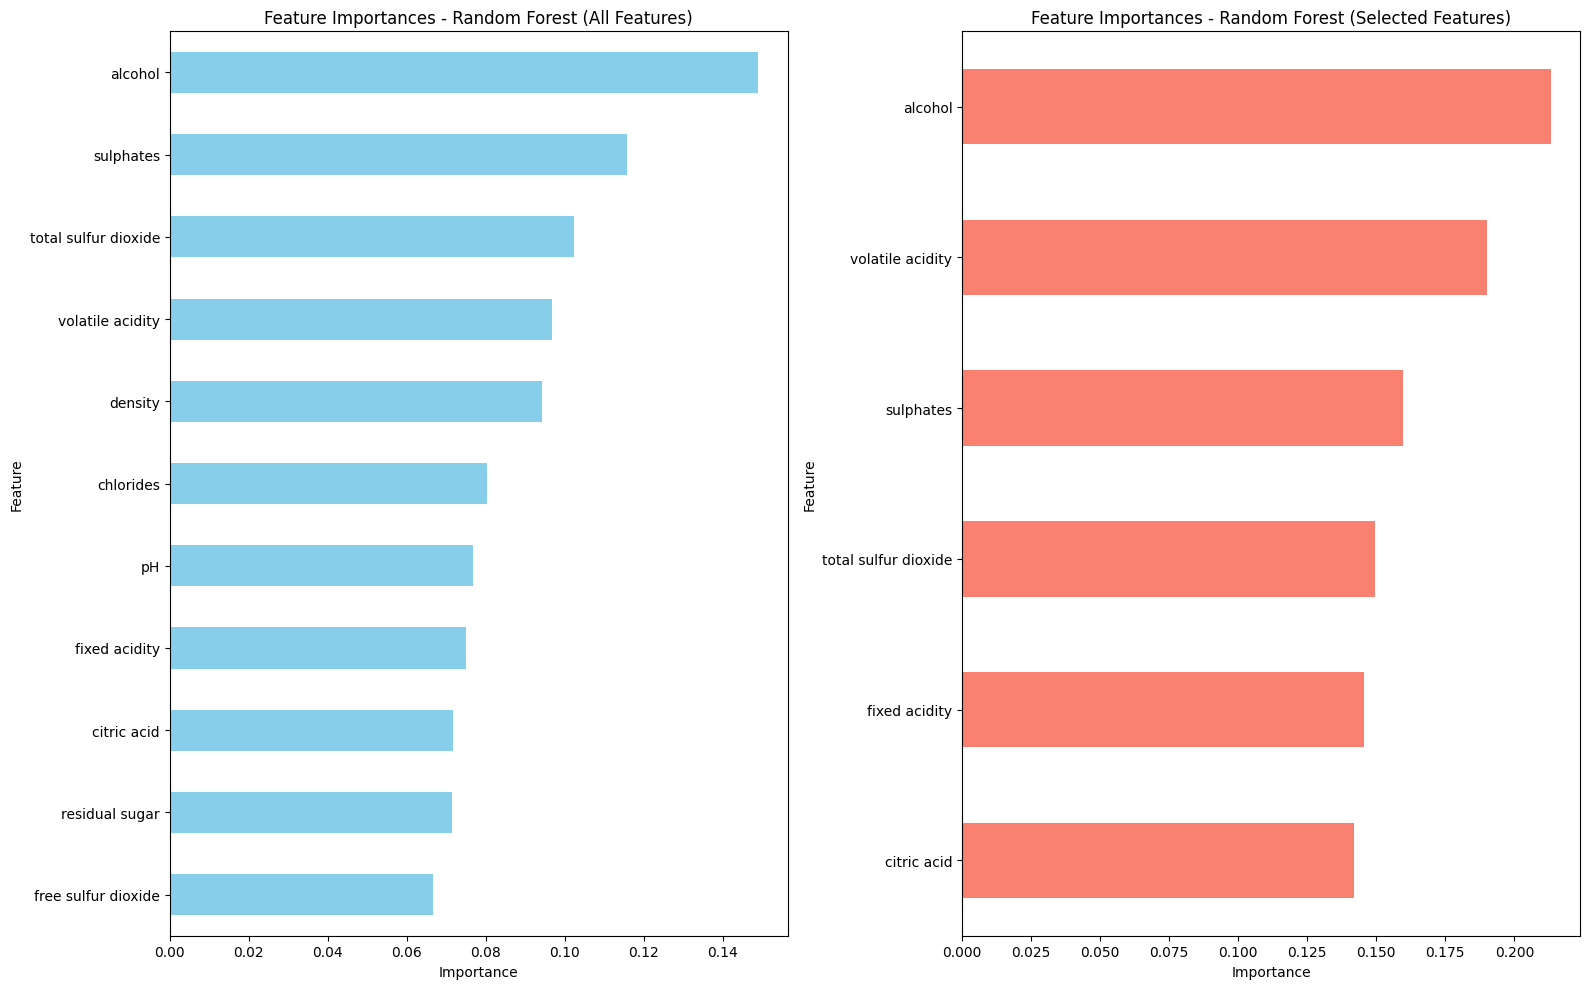

In [12]:
# Feature Importances from Random Forest (Without Modifications)
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Feature Importances from Random Forest with Modifications
feature_importances_rf_selected = pd.Series(rf_model_selected.feature_importances_, index=selected_feature_names).sort_values(ascending=True)


# Setting up the matplotlib figure
plt.figure(figsize=(16, 10))

# Plot for Random Forest without modifications
plt.subplot(1, 2, 1)
feature_importances_rf.plot(kind='barh', color='skyblue')
plt.title('Feature Importances - Random Forest (All Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Plot for Random Forest with modifications
plt.subplot(1, 2, 2)
feature_importances_rf_selected.plot(kind='barh', color='salmon')
plt.title('Feature Importances - Random Forest (Selected Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


The feature importance graph shows how the Random Forest classifier identifies "alcohol" as the most significant feature, both in the full feature set and in the selected subset of six features. The selected feature subset prioritizes "alcohol," "volatile acidity," and "sulphates," which strongly contribute to the model's predictions. By focusing on these top features, the model achieves better results while maintaining performance.